In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
cc = pd.read_csv("C:\\Users\\Shubham D\\Downloads\\CocaCola_Sales_Rawdata.csv")

In [3]:
cc

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
cc.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
cc.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
cc.shape

(42, 2)

In [8]:
cc.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [9]:
cc.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [10]:
cc.dtypes

Quarter     object
Sales      float64
dtype: object

<AxesSubplot:xlabel='Sales'>

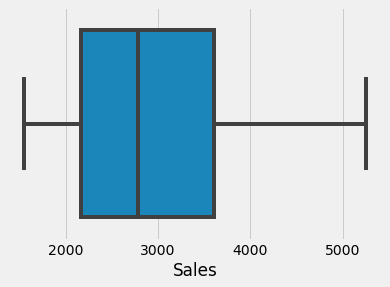

In [11]:
# Boxplot for ever
sns.boxplot("Sales",data = cc)

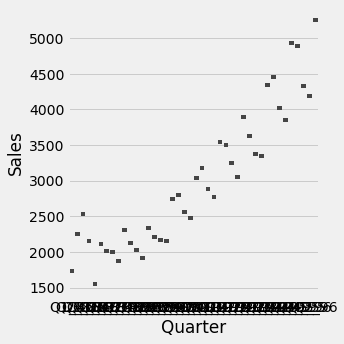

In [12]:
sns.factorplot("Quarter","Sales",data=cc,kind="box")

<AxesSubplot:>

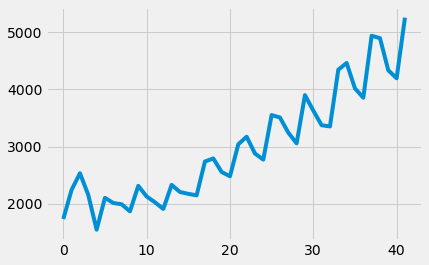

In [13]:
# moving average for the time series to understand better about the treand charater in amtrak
cc.Sales.plot(label='org')

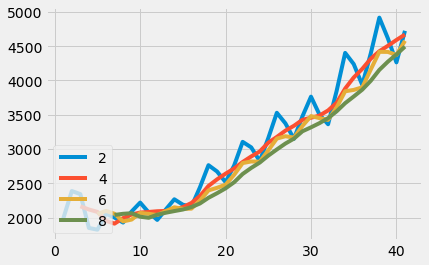

In [14]:
for i in range(2,10,2):
    cc["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

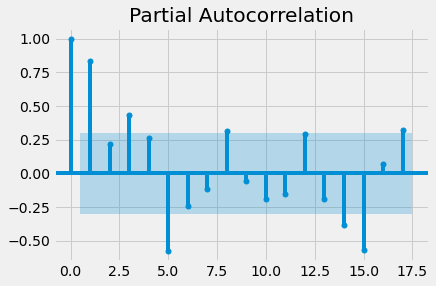

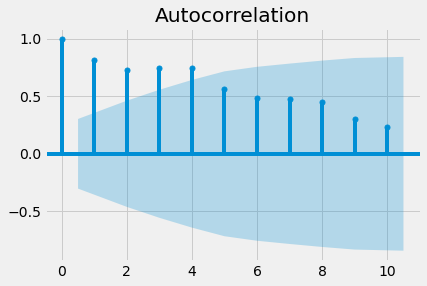

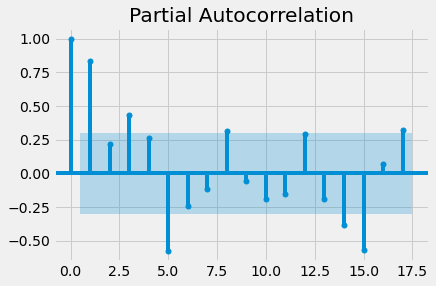

In [15]:
# ack plots and PACF plots on Original data sets
tsa_plots.plot_acf(cc.Sales,lags=10)
tsa_plots.plot_pacf(cc.Sales)

In [16]:
# Amtrak.index.freq = 'MS'
# splitting the data into Train and Test data and  condering the last 12months as 
# test data and left over data as train data
Train = cc.head(48)
Test = cc.tail(12)
Test.set_index(np.arange(1,13),inplace= True)

In [17]:
# creating a function to calculate to MAPE value for test data
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [18]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

50.695468506171416

In [19]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

49.37800033223661

In [20]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

49.57559961708085

In [21]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

49.62027838801115

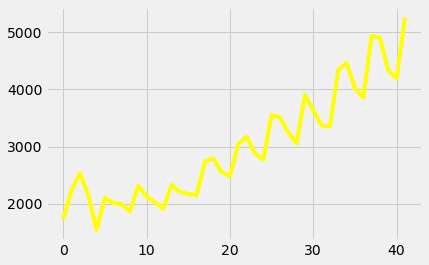

In [22]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="yellow")

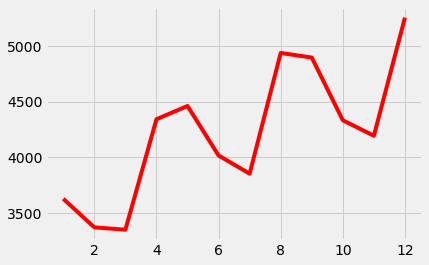

In [23]:
plt.plot(Test.index, Test["Sales"], label='Test',color="red")

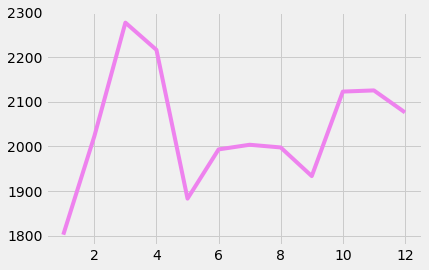

In [24]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="violet")

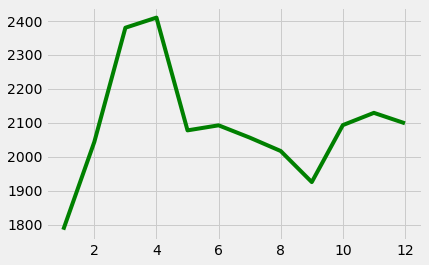

In [25]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="green")

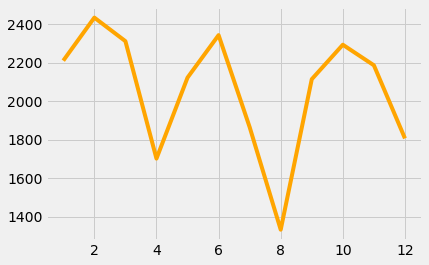

In [26]:
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="orange")

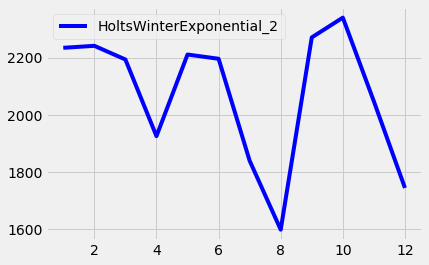

In [27]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="blue")
plt.legend(loc='best')

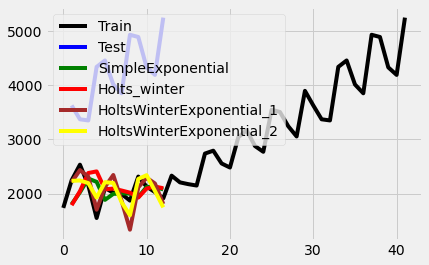

In [28]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

In [29]:
from pandas_profiling import ProfileReport
PR=ProfileReport(cc)
PR

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
airline= pd.read_csv("C:\\Users\\Shubham D\\Downloads\\Airlines+Data.csv")

In [31]:
airline

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [32]:
airline.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [33]:
airline.tail()

,Month,Passengers
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271
95,Dec-02,306


In [34]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [35]:
airline.shape

(96, 2)

In [36]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [37]:
airline.dtypes

Month         object
Passengers     int64
dtype: object

In [38]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [39]:
airline.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


<AxesSubplot:xlabel='Passengers'>

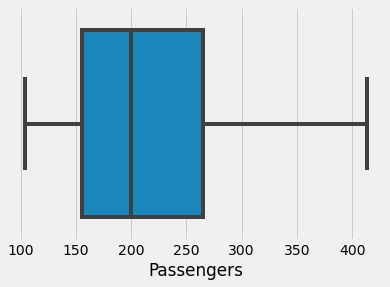

In [40]:
sns.boxplot("Passengers",data=airline)

<AxesSubplot:>

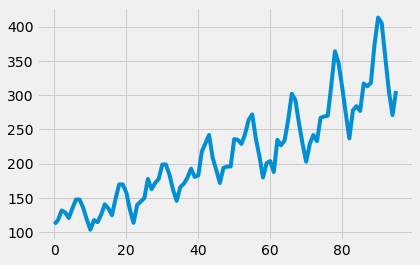

In [41]:
airline.Passengers.plot()

# Moving Average

In [42]:
Train = airline.head(70)
Test = airline.tail(26)

# Time Series Decomposition 

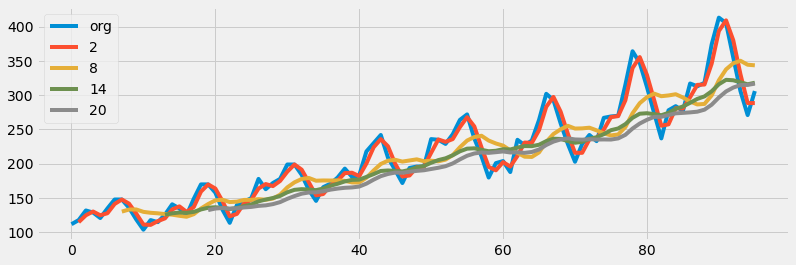

In [43]:
plt.figure(figsize=(12,4))
airline.Passengers.plot(label="org")
for i in range(2,24,6):
    airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

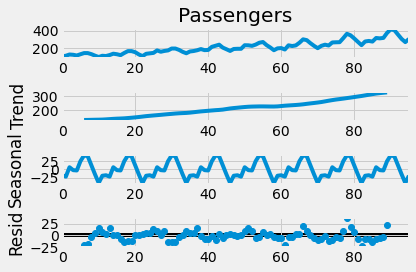

In [44]:
decompose_ts_add = seasonal_decompose(airline.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PCAF plots¶

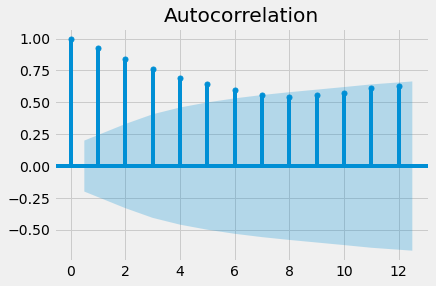

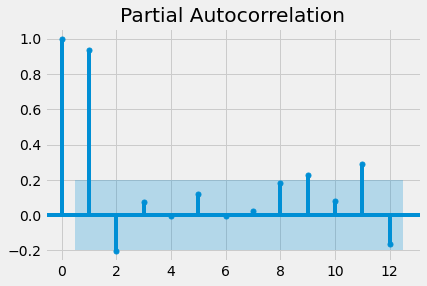

In [45]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline.Passengers,lags=12)
tsa_plots.plot_pacf(airline.Passengers,lags=12)
plt.show()

# Evaluation metric MAPE

In [46]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponetional Method

In [47]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

17.662700175279245

# Holt Method

In [48]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

34.72630547558237

# Holts winter exponential smoothing

In [49]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

10.30583769868401

# Holts winter exponential with Multicative

In [50]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

9.102725608792328

# final model

In [51]:
hwe_model_add_add = ExponentialSmoothing(airline["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

# Predication

In [52]:
hwe_model_add_add.forecast(50)

96     319.235281
97     311.528396
98     350.278697
99     346.984962
100    351.845000
101    403.925721
102    440.566848
103    427.446585
104    376.628288
105    329.767602
106    296.561352
107    341.114831
108    347.229387
109    339.522502
110    378.272803
111    374.979068
112    379.839106
113    431.919828
114    468.560954
115    455.440691
116    404.622394
117    357.761708
118    324.555458
119    369.108937
120    375.223493
121    367.516609
122    406.266909
123    402.973175
124    407.833212
125    459.913934
126    496.555060
127    483.434797
128    432.616500
129    385.755814
130    352.549564
131    397.103043
132    403.217600
133    395.510715
134    434.261016
135    430.967281
136    435.827319
137    487.908040
138    524.549167
139    511.428904
140    460.610607
141    413.749921
142    380.543671
143    425.097150
144    431.211706
145    423.504821
dtype: float64

In [53]:
from pandas_profiling import ProfileReport
PR=ProfileReport(airline)
PR

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]